
## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris 

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier


from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


# hide warnings
import warnings
warnings.filterwarnings('ignore')

## 2. Load Dataset

In [2]:
#from sklearn.datasets import load_iris

# create bunch object containing iris dataset and its attributes.
iris = load_iris()

In [3]:
# if we want to know what sort of detail is provided with this dataset
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
# the info will tell us more
print (iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
# convert data from a Scikit-learn bunch object to a pandas DataFrame
df_iris = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df_iris['target'] = iris['target']

## 3. Summarize the Dataset

In [6]:
# peek at the data
df_iris.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [7]:
# dimensions of the dataset
df_iris.shape

(150, 5)

In [8]:
# data types
df_iris.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int32
dtype: object

In [9]:
# statistical summary
pd.set_option('precision', 3)
df_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000,150.000,150.000,150.000,150.000
mean,5.843,3.057,3.758,1.199,1.000
std,0.828,0.436,1.765,0.762,0.819
min,4.300,2.000,1.000,0.100,0.000
25%,5.100,2.800,1.600,0.300,0.000
50%,5.800,3.000,4.350,1.300,1.000
75%,6.400,3.300,5.100,1.800,2.000
max,7.900,4.400,6.900,2.500,2.000


all of the numerical values have the same scale (centimeters) and similar ranges between 0 and 8 centimeters

In [10]:
# class distribution
df_iris.groupby('target').size()
#df_iris.target.value_counts()

target
0    50
1    50
2    50
dtype: int64

each class has the same number of instances (50 or 33% of the dataset).

In [11]:
# pairwise Pearson correlations
df_iris.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000,-0.118,0.872,0.818,0.783
sepal width (cm),-0.118,1.000,-0.428,-0.366,-0.427
petal length (cm),0.872,-0.428,1.000,0.963,0.949
petal width (cm),0.818,-0.366,0.963,1.000,0.957
target,0.783,-0.427,0.949,0.957,1.000


In [12]:
# skew for each attribute
df_iris.drop(columns='target').skew() #positive (right) or negative (left) skew

sepal length (cm)    0.315
sepal width (cm)     0.319
petal length (cm)   -0.275
petal width (cm)    -0.103
dtype: float64

## 4. Data Visualization

### a. Univariate Plots

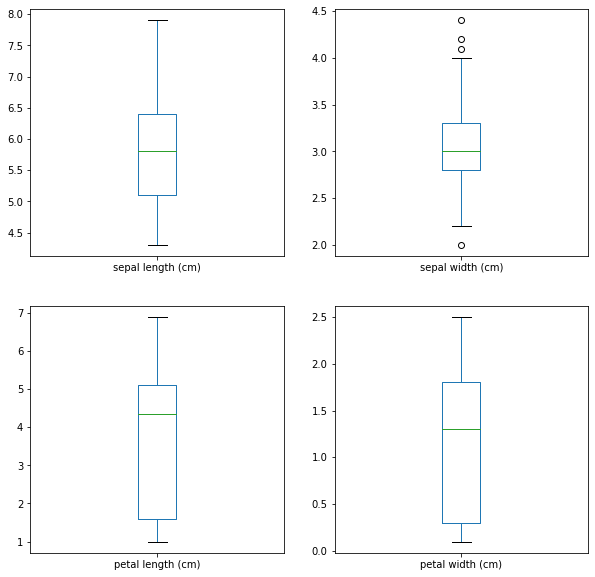

In [13]:
#import matplotlib.pyplot as plt
#import seaborn as sns

# box and whisker plots
df_iris.drop(columns='target').plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(10,10))
plt.show()
#sns.boxplot(data=df_iris.drop(columns='target'))

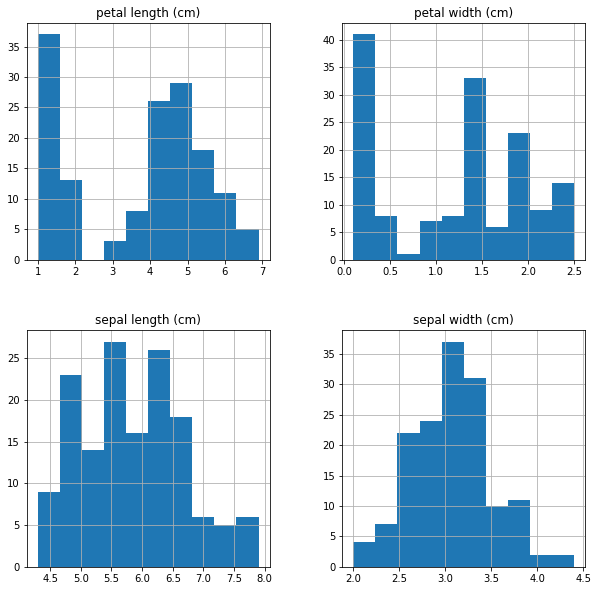

In [14]:
# histograms
df_iris.drop(columns='target').hist(figsize=(10,10))
plt.show()

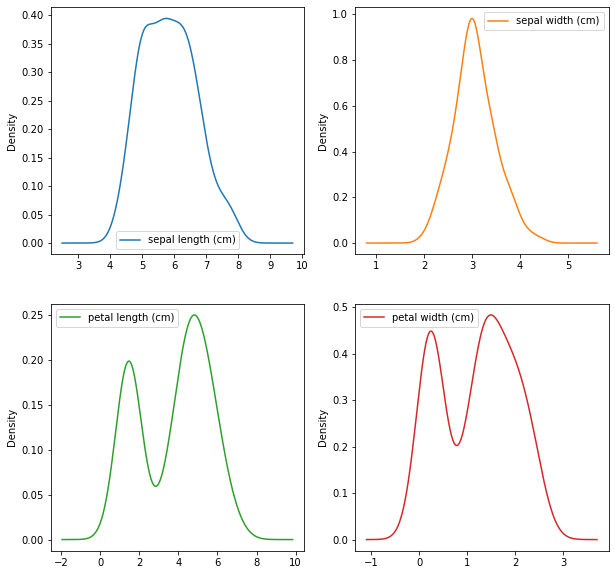

In [15]:
# density
df_iris.drop(columns='target').plot(kind='density', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(10,10))
plt.show()

It looks like perhaps two of the input variables have a Gaussian distribution.

### b. Multivariate Plots

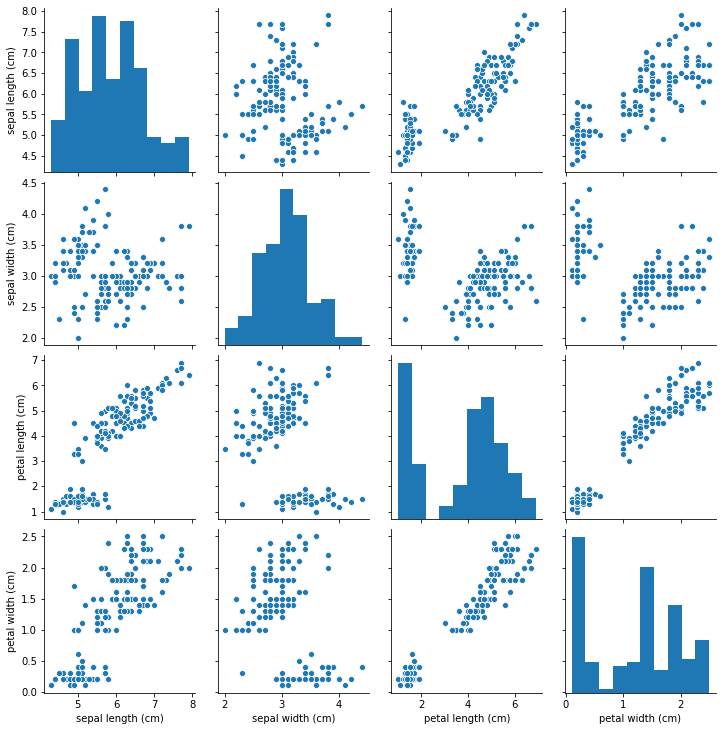

In [16]:
# scatter plot
sns.pairplot(df_iris.drop(columns='target'))

Note the diagonal grouping of some pairs of attributes. This suggests a high correlation and a predictable relationship.

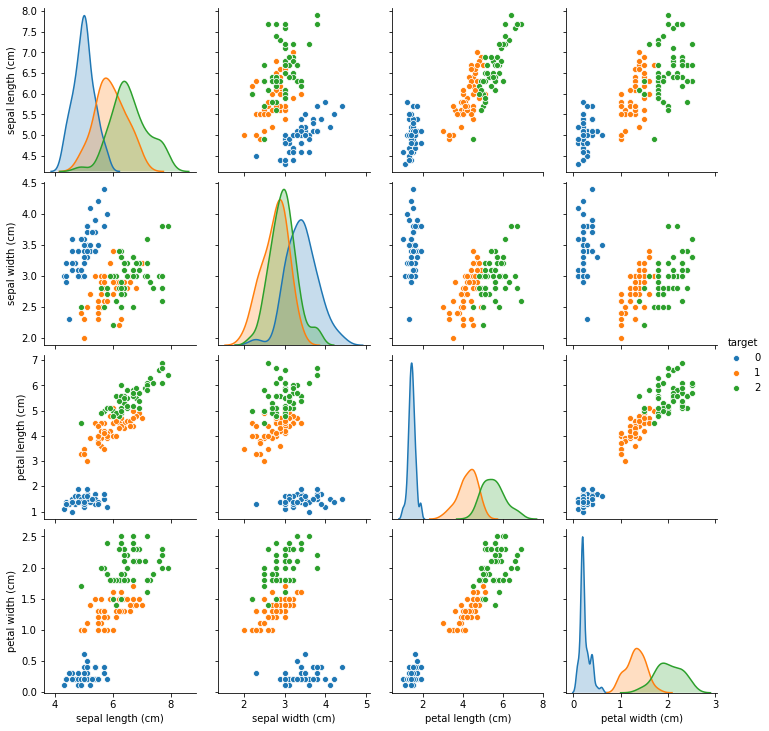

In [17]:
# different labels in different color
sns.pairplot(df_iris, hue='target')

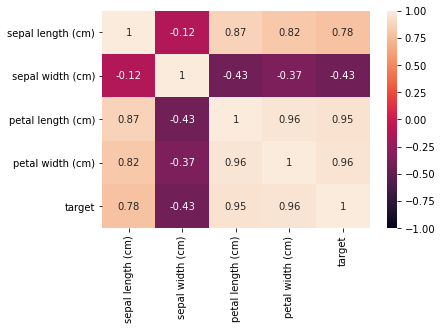

In [18]:
# heatmap - correlation
sns.heatmap(df_iris.corr(),vmin=-1, vmax=1, annot=True)

## 5. Split the data

In [19]:
#from sklearn.model_selection import train_test_split

X = df_iris.iloc[:,:-1].values
y = df_iris.iloc[:,-1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

## 6. Evaluate Algorithms

In [20]:
#from sklearn.linear_model import LogisticRegression
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.naive_bayes import GaussianNB
#from sklearn.svm import SVC

#from sklearn.model_selection import KFold
#from sklearn.model_selection import cross_val_score


# Spot-Check Algorithms

models = []
models.append(('LOG', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model in turn

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring ='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (+/-%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LOG: 0.958333 (+/-0.055902)
LDA: 0.966667 (+/-0.040825)
KNN: 0.975000 (+/-0.038188)
CART: 0.950000 (+/-0.055277)
NB: 0.958333 (+/-0.055902)
SVM: 0.966667 (+/-0.040825)


 KNN has the largest estimated accuracy score and may be worth further study.

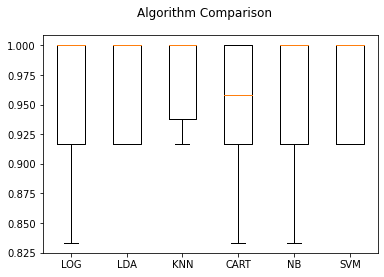

In [21]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

We can see that the box and whisker plots are squashed at the top of the range, with many samples achieving approx. 100% accuracy.

## 7. Improve Results

### Tuning

Result for KNN very good so we don't tune models.

### Ensemble Methods

In [22]:
#from xgboost import XGBClassifier
#from sklearn.ensemble import AdaBoostClassifier
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import ExtraTreesClassifier

# Spot-Check Ensemble Algorithms

ensembles = []
ensembles.append(('XGB', XGBClassifier()))
ensembles.append(('ADA', AdaBoostClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))  

# evaluate each model in turn

results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring ='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

XGB: 0.958333 (0.041667)
ADA: 0.950000 (0.055277)
RF: 0.958333 (0.055902)
ET: 0.950000 (0.055277)


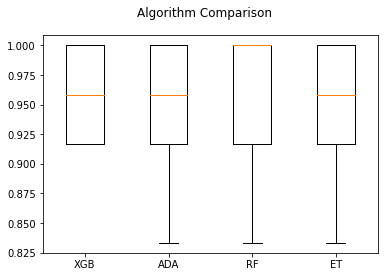

In [23]:
# Compare Ensemble Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Results are not good as for KNN.

## 8. Make Predictions

In [24]:
#from sklearn.metrics import classification_report
#from sklearn.metrics import confusion_matrix
#from sklearn.metrics import accuracy_score



knn=KNeighborsClassifier()
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

1.0
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



We can see that for KNN the accuracy is 100%. The confusion matrix provides an indication of the none errors made. Finally the classification report provides a breakdown of each class by precision, recall, f1-score and support showing excellent results.